In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df = data.drop(['img_name','ethnicity'], axis=1)
df

,age,gender,pixels
0,1,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...
23700,99,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [7]:
# delete all rows with column 'Age' has value less than 15
indexAge = df[df['age'] <15].index
df.drop(indexAge , inplace=True)

In [8]:
indexAge = df[df['age'] >=25].index
df.drop(indexAge , inplace=True)

In [9]:
df = df.drop('age', axis=1)
df

,gender,pixels
1744,1,44 57 51 34 84 60 74 160 182 189 200 204 208 2...
1745,1,135 133 70 48 29 19 18 41 70 82 89 98 107 108 ...
1746,1,32 36 32 35 37 37 52 76 99 112 139 172 186 182...
1747,1,118 117 124 150 185 221 206 218 209 189 51 45 ...
1748,1,90 69 56 47 53 65 75 79 83 85 91 92 92 94 100 ...
...,...,...
5473,1,47 65 58 63 67 71 78 84 84 80 76 75 75 81 84 8...
5474,1,34 43 69 88 107 110 129 141 146 151 150 149 15...
5475,1,224 184 52 16 21 27 49 102 126 121 122 125 129...
5476,1,0 0 3 12 45 55 47 74 25 31 42 47 44 46 49 52 6...


In [10]:
def basic_eda(df):
    print("\n Shape: ")
    print(df.shape)
    print("\n\n --------- ")
    print("\n Number of null values: ")
    print(df.isnull().sum())
    print("\n\n --------- ")
    
    print("\n Value count of gender: ")
    print(df['gender'].value_counts())

In [11]:
basic_eda(df)


 Shape: 
(3252, 2)


 --------- 

 Number of null values: 
gender    0
pixels    0
dtype: int64


 --------- 

 Value count of gender: 
1    2087
0    1165
Name: gender, dtype: int64


In [12]:
# Dividing target variables
y = df.drop("pixels", axis=1)
X = df.drop("gender", axis=1)

In [13]:
X.head()

,pixels
1744,44 57 51 34 84 60 74 160 182 189 200 204 208 2...
1745,135 133 70 48 29 19 18 41 70 82 89 98 107 108 ...
1746,32 36 32 35 37 37 52 76 99 112 139 172 186 182...
1747,118 117 124 150 185 221 206 218 209 189 51 45 ...
1748,90 69 56 47 53 65 75 79 83 85 91 92 92 94 100 ...


In [14]:
y.head()

,gender
1744,1
1745,1
1746,1
1747,1
1748,1


In [15]:
y.nunique()

gender    2
dtype: int64

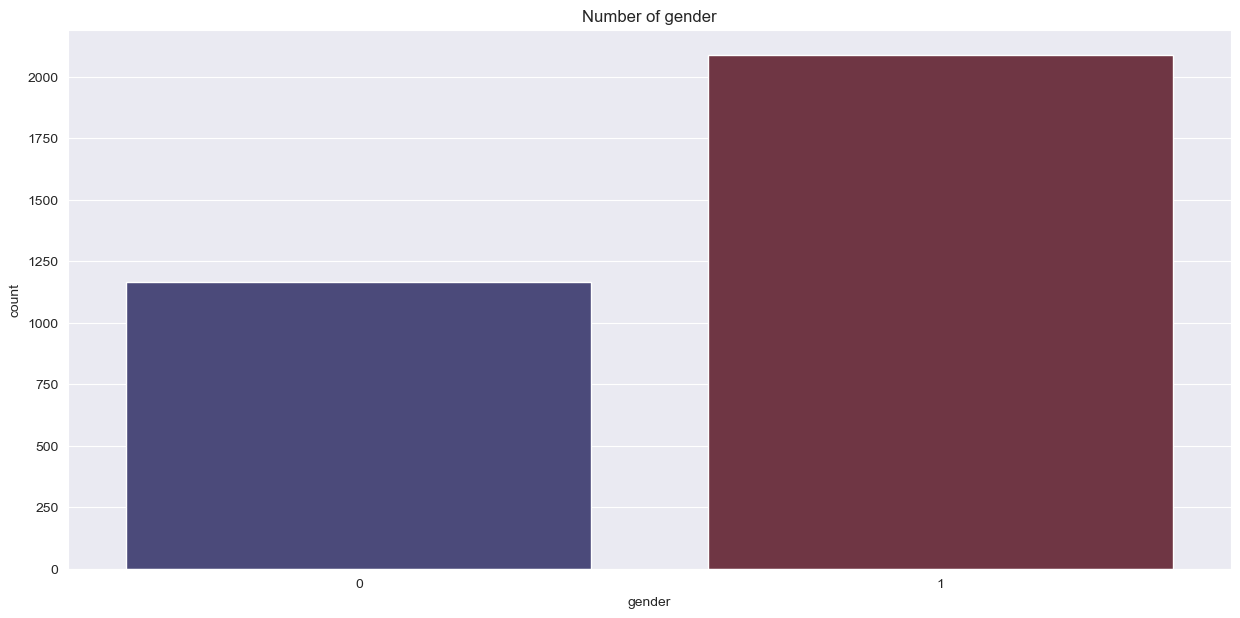

In [16]:
for i in y.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

In [17]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (3252, 48, 48, 1)


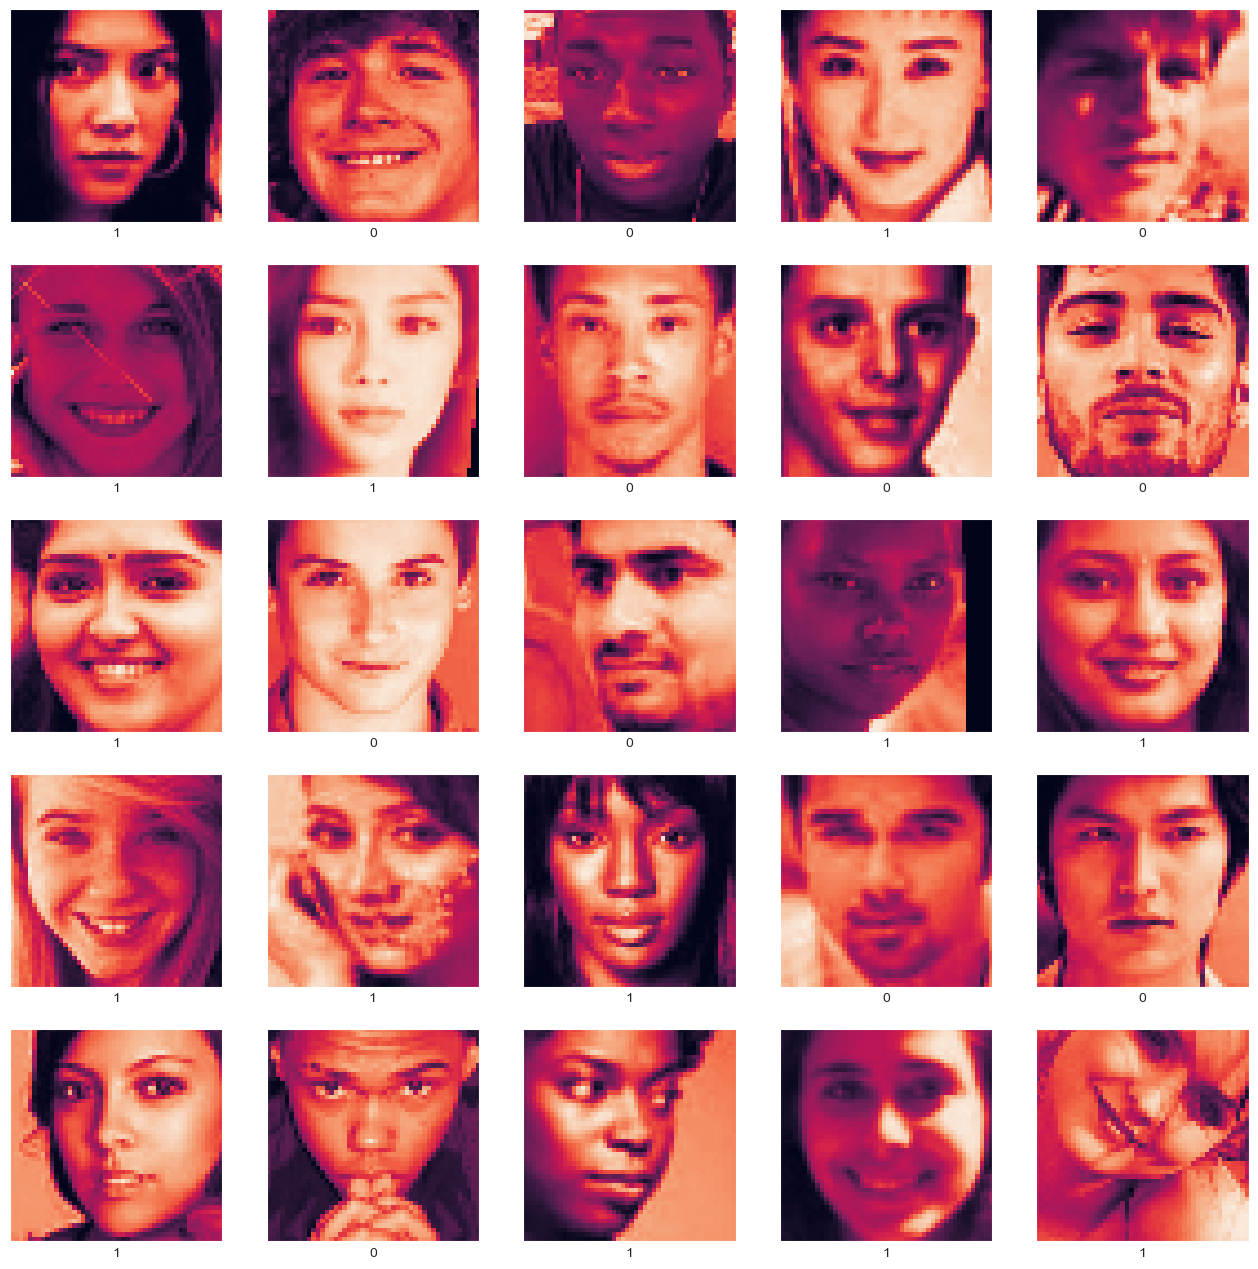

In [18]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 3252, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(str(y['gender'].iloc[i]))
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
#import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

In [20]:
gender_matrix = np.array(y['gender'])
gender = to_categorical(y["gender"], num_classes = 2)

print(gender)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [21]:
X = X / 255

In [22]:
datagen = ImageDataGenerator(
        featurewise_center = False,
    # set input mean to 0 over the dataset
       samplewise_center = False,
    # set each sample mean to 0 
       featurewise_std_normalization = False,
    # divide inputs by std of the dataset
       samplewise_std_normalization=False,  
    # divide each input by its std
       zca_whitening=False,
    # dimesion reduction
       rotation_range=5, 
    # randomly rotate images in the range 5 degrees
       zoom_range = 0.1,
    # Randomly zoom image 10%
       width_shift_range=0.1, 
    # randomly shift images horizontally 10%
       height_shift_range=0.1,  
    # randomly shift images vertically 10%
       horizontal_flip=False,  
    # randomly flip images
        vertical_flip=False  # randomly flip images
)

datagen.fit(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.2, random_state=42)

X_train_gender, X_val_gender, y_train_gender, y_val_gender = train_test_split(X_train_gender, y_train_gender, test_size=0.2, random_state=42)

In [24]:
print(X_train_gender.shape)

(2080, 48, 48, 1)


In [25]:
def my_model(num_classes, activation, loss):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

In [26]:
early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

In [32]:
epochs = 50
batch_size = 50
model_gender = my_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(X_train_gender, y_train_gender, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (X_val_gender, y_val_gender),
                                 steps_per_epoch = X_train_gender.shape[0] // batch_size, callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/50
41/41 [==============================] - 13s 283ms/step - loss: 0.7874 - accuracy: 0.7034 - val_loss: 1.5348 - val_accuracy: 0.7198 - lr: 0.0010
Epoch 2/50
41/41 [==============================] - 11s 281ms/step - loss: 0.4274 - accuracy: 0.8074 - val_loss: 2.2250 - val_accuracy: 0.6468 - lr: 0.0010
Epoch 3/50
41/41 [==============================] - 12s 294ms/step - loss: 0.3163 - accuracy: 0.8670 - val_loss: 2.3600 - val_accuracy: 0.7428 - lr: 0.0010
Epoch 4/50
41/41 [==============================] - 13s 314ms/step - loss: 0.3088 - accuracy: 0.8700 - val_loss: 2.0240 - val_accuracy: 0.6468 - lr: 0.0010
Epoch 5/50
41/41 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9030
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
41/41 [==============================] - 21s 518ms/step - loss: 0.2436 - accuracy: 0.9030 - val_loss: 1.4459 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 6/50
41/41 [==============================] - 20s 497ms

<AxesSubplot:title={'center':'accuracy'}>

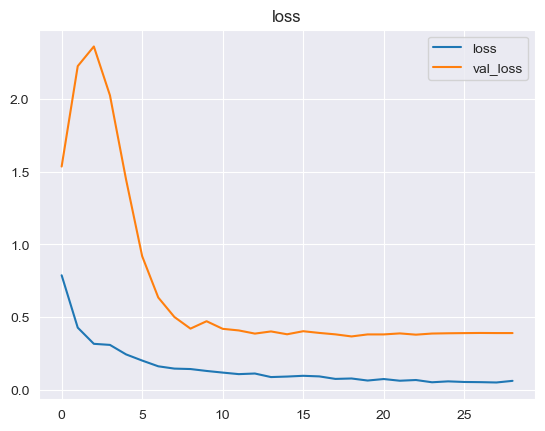

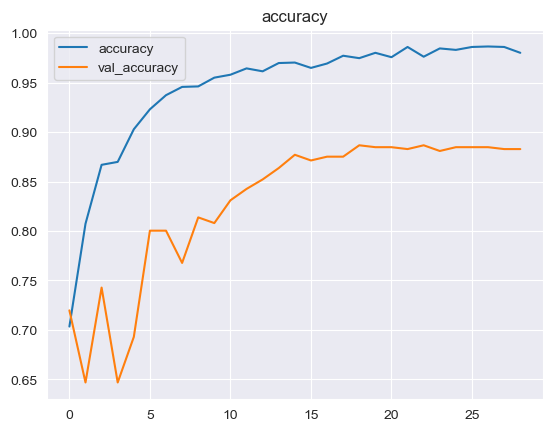

In [33]:
history_df = pd.DataFrame(history_gender.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [34]:
loss, acc = model_gender.evaluate(X_test_gender, y_test_gender, verbose=0)
print("Test loss: {}".format(loss))
print("Test Accuracy: {}".format(acc))

Test loss: 0.2526562213897705
Test Accuracy: 0.9170507192611694


1/1 [==============================] - 1s 612ms/step
Predicted Sex: Female


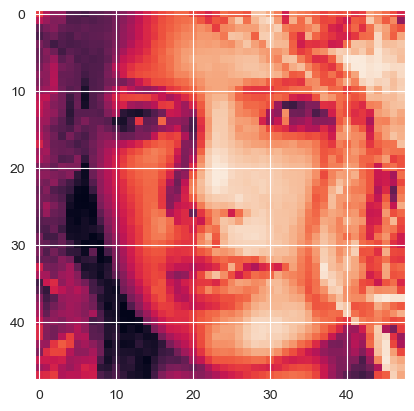

In [39]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']

  #age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  #print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

test_image(256,X, model_gender)

1/1 [==============================] - 0s 116ms/step
Predicted Sex: Male


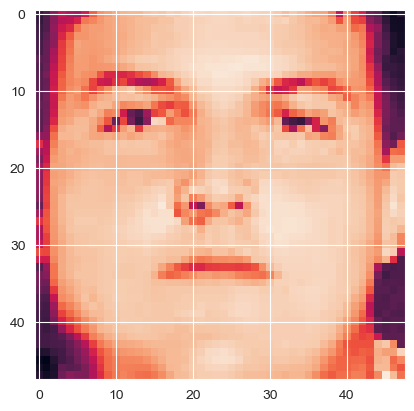

In [36]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']

  #age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  #print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

test_image(351,X, model_gender)